## Title
By: Philip Tian, Jonathan Lin, David Ahmed

States-hitorical/US-historical from COVID Tracking Project<br>
CasesDeathsCounty/CountyConfirmedCases from John Hopkins

In [97]:
import pandas as pd
from plotnine import *

data = pd.read_csv("Data/States-historical.csv")

data = data[['state','date','positive','negative','pending','death','positiveIncrease','negativeIncrease','hospitalizedCurrently']]
data['date'] = pd.to_datetime(data['date'],format = '%Y%m%d')
cases = data.groupby(['state','date']).agg({'positive': 'sum'}).reset_index().sort_values('state')
#print(data.to_string())

In [129]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME',
          'MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA',
          'RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC','AS','GU','MP','PR','VI']

states_df = list()
for s in states:
    df = data.query('state == @s').copy()
    ratio = list()
    for i, row in df.iterrows():
        if (row['positive'] + row['negative']) != 0:
            ratio.append(row['positive']/(row['positive'] + row['negative']))
        else:
            ratio.append(0)
    df['positiveRatio'] = ratio
    states_df.append(df)
#print(states_df)

C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


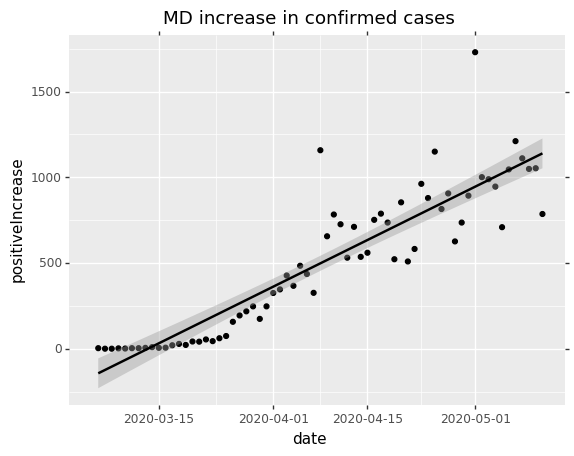

<ggplot: (156131346352)>

In [130]:
(ggplot(states_df[19],aes(y='positiveIncrease',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[19].iloc[0]['state']+" increase in confirmed cases"))

In [131]:
#TODO: make linear regression for all 56 states + US overall
#TODO: make similar lists/graphs for deaths, for comparing ratio of positve:negative/total, and for hospitilizations

     state       date  positive  negative   death  positiveIncrease  negativeIncrease  hospitalizedCurrently  positiveRatio
47      TX 2020-05-11   39869.0  485828.0  1100.0            1000.0           22921.0                 1525.0       0.075840
103     TX 2020-05-10   38869.0  462907.0  1088.0            1009.0           11473.0                 1626.0       0.077463
159     TX 2020-05-09   37860.0  451434.0  1049.0            1251.0           10925.0                 1735.0       0.077377
215     TX 2020-05-08   36609.0  440509.0  1004.0            1219.0           20737.0                 1734.0       0.076729
271     TX 2020-05-07   35390.0  419772.0   973.0             968.0           15256.0                 1750.0       0.077753
327     TX 2020-05-06   34422.0  404516.0   948.0            1053.0           10675.0                 1812.0       0.078421
383     TX 2020-05-05   33369.0  393841.0   906.0            1037.0           18775.0                 1888.0       0.078109
439     

C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 13 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


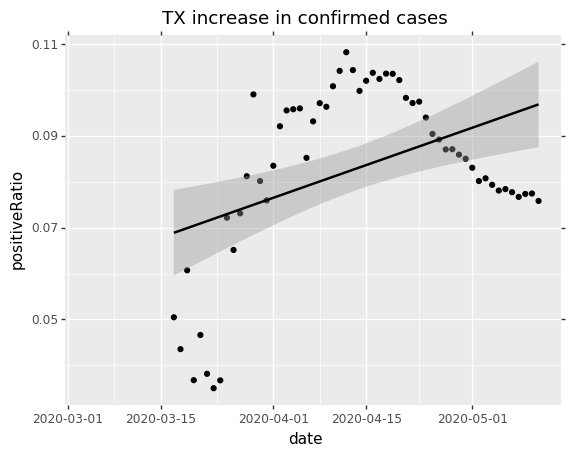

<ggplot: (156131352363)>

In [135]:
print(states_df[42].to_string())
(ggplot(states_df[42],aes(y='positiveRatio',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[42].iloc[0]['state']+" increase in confirmed cases"))